<a href="https://colab.research.google.com/github/namratha2731/ML-/blob/main/A10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_excel(r"Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')
data.replace('?', np.nan, inplace=True)

# Calculating JC,SMC and COS between the vectors

In [2]:
binary_cols = [col for col in data.columns if set(data[col].dropna().unique()) <= {'t', 'f'}]
binary_cols += [col for col in data.columns if set(data[col].dropna().unique()) <= {'M', 'F'}]

data[binary_cols] = data[binary_cols].replace({'t': 1, 'f': 0, 'M': 1, 'F': 0})

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].mean(), inplace=True)

subset_data = data.iloc[:20]
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cos_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        if i != j:
            v1 = subset_data.iloc[i, :].values
            v2 = subset_data.iloc[j, :].values

            v1_bin = subset_data.loc[i, binary_cols].astype(int)
            v2_bin = subset_data.loc[j, binary_cols].astype(int)

            f11 = np.sum((v1_bin == 1) & (v2_bin == 1))
            f00 = np.sum((v1_bin == 0) & (v2_bin == 0))
            f10 = np.sum((v1_bin == 1) & (v2_bin == 0))
            f01 = np.sum((v1_bin == 0) & (v2_bin == 1))

            jc_matrix[i, j] = f11 / (f01 + f10 + f11)
            smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11)


            v1_all = v1.reshape(1, -1)
            v2_all = v2.reshape(1, -1)
            cos_matrix[i, j] = cosine_similarity(v1_all, v2_all)[0][0]

# Plotting the heatmap of the dataset

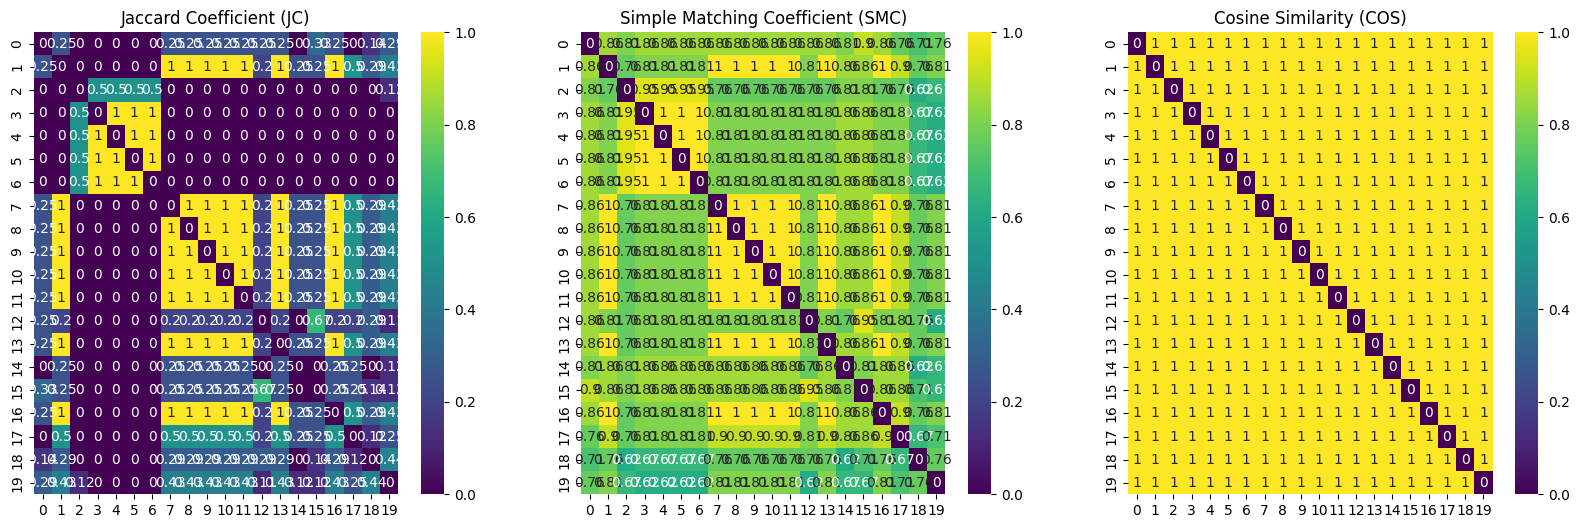

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(jc_matrix, annot=True, cmap='viridis', ax=axs[0])
axs[0].set_title('Jaccard Coefficient (JC)')

sns.heatmap(smc_matrix, annot=True, cmap='viridis', ax=axs[1])
axs[1].set_title('Simple Matching Coefficient (SMC)')

sns.heatmap(cos_matrix, annot=True, cmap='viridis', ax=axs[2])
axs[2].set_title('Cosine Similarity (COS)')

plt.show()